In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0')

In [4]:
# create a few more features
data['longitude_diff'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['latitude_diff'] = abs(data.dropoff_latitude - data.pickup_latitude)
data['distance'] = data.longitude_diff **2 + data.latitude_diff ** 2

more_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'passenger_count',
                 'longitude_diff',
                 'latitude_diff',
                 'distance']

In [5]:
y = data.fare_amount
x = data[more_features]
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=123)
first_model = RandomForestRegressor(n_estimators=30, random_state=123).fit(train_x, train_y)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x108d33c18>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1caa4240>})

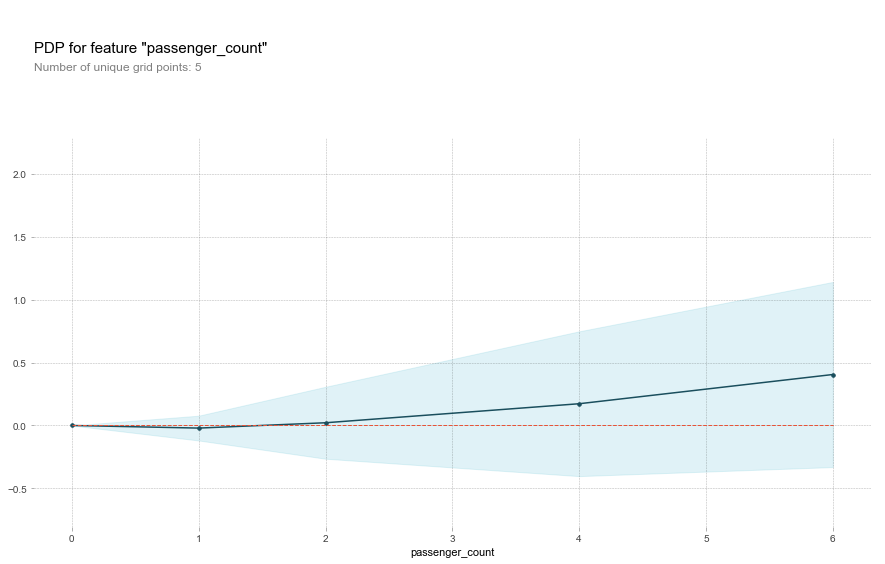

In [6]:
pdp_goals = pdp.pdp_isolate(model=first_model, dataset=val_x, model_features=more_features, feature='passenger_count')

pdp.pdp_plot(pdp_goals, 'passenger_count')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1ca41668>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1d0b8a58>})

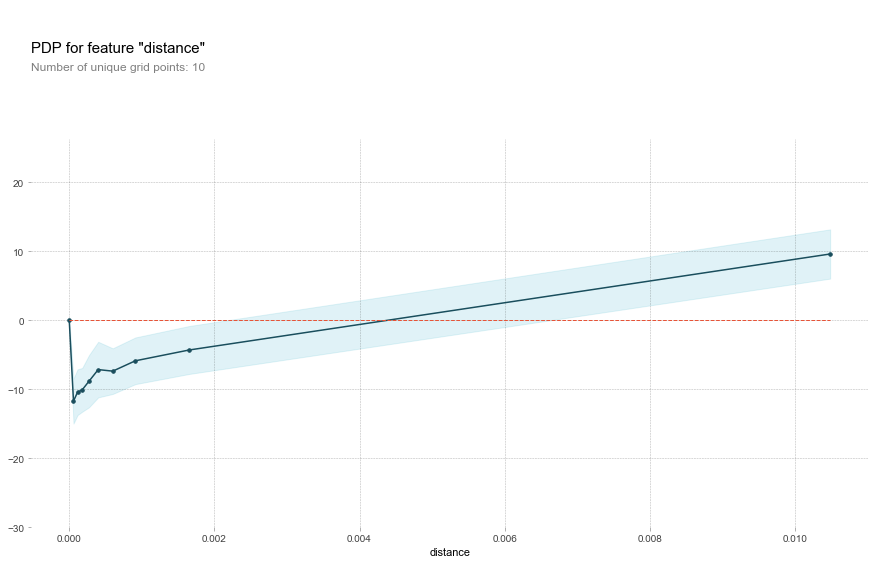

In [7]:
pdp_goals = pdp.pdp_isolate(model=first_model, dataset=val_x, model_features=more_features, feature='distance')

pdp.pdp_plot(pdp_goals, 'distance')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1dd838d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1cb049b0>})

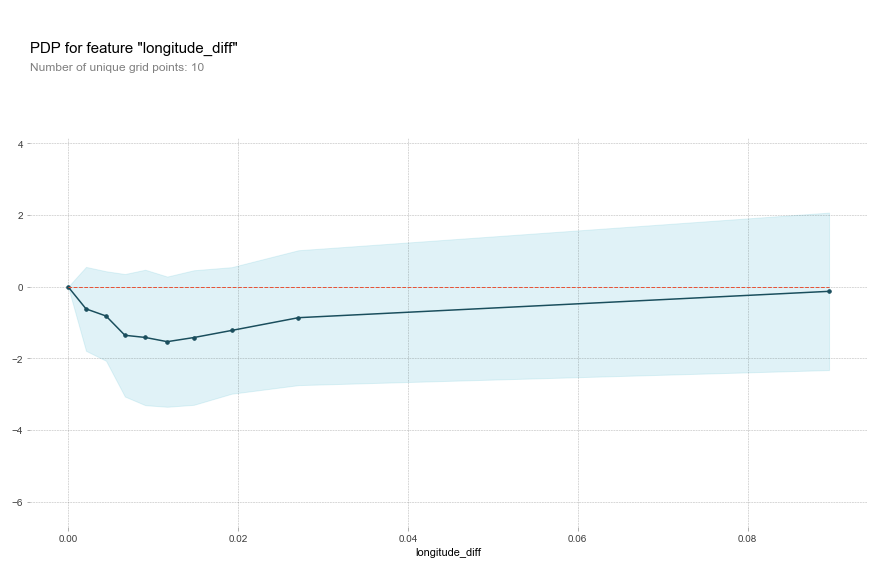

In [8]:
pdp_goals = pdp.pdp_isolate(model=first_model, dataset=val_x, model_features=more_features, feature='longitude_diff')

pdp.pdp_plot(pdp_goals, 'longitude_diff')

### 2D plots

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

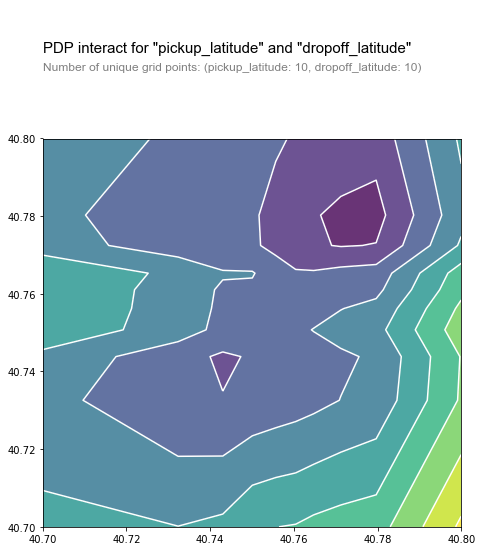

In [9]:
features_to_plot = ['pickup_latitude', 'dropoff_latitude']

inter1 = pdp.pdp_interact(model=first_model, dataset=val_x, model_features=more_features,
                          features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()